In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models , layers , utils

In [86]:
df_train=pd.read_csv('D:\DataScience\\fashion-mnist_train\\fashion-mnist_train.csv')

In [87]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [88]:
df_train.shape

(60000, 785)

In [89]:
X=df_train.drop('label',axis=1)
y=df_train['label']

In [90]:
print(f'X {X.shape} y{y.shape}')

X (60000, 784) y(60000,)


In [91]:
X=X.values.reshape(-1,28,28,1)/255
X.shape

(60000, 28, 28, 1)

In [92]:
y=utils.to_categorical(y,10)
y.shape

(60000, 10)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
print(f'X_train {X_train.shape} y_train{y_train.shape}')

X_train (48000, 28, 28, 1) y_train(48000, 10)


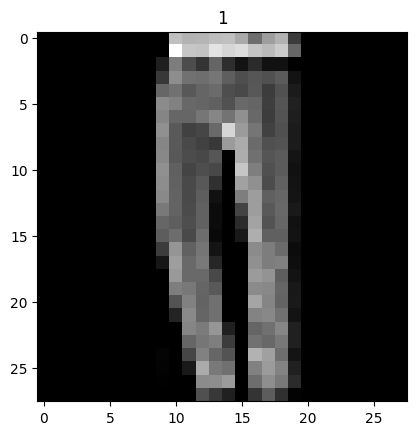

In [95]:
plt.imshow(X_train[50],cmap='gray')
plt.title(np.argmax(y_train[50]))
plt.show()

In [96]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dropout(0,5),

    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [98]:
model.fit(
    X_train,y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test,y_test)
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8034 - loss: 0.5399 - val_accuracy: 0.8649 - val_loss: 0.3762
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8742 - loss: 0.3495 - val_accuracy: 0.8808 - val_loss: 0.3382
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8906 - loss: 0.2995 - val_accuracy: 0.8827 - val_loss: 0.3186
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9025 - loss: 0.2632 - val_accuracy: 0.8992 - val_loss: 0.2734
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9140 - loss: 0.2357 - val_accuracy: 0.9038 - val_loss: 0.2672
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9189 - loss: 0.2161 - val_accuracy: 0.9074 - val_loss: 0.2510
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9276 - loss: 0.1940 - val_accuracy: 0.8976 - val_loss: 0.2822
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9338 - loss: 0.1767 - val_accuracy: 0.

In [99]:
score=model.evaluate(X_test,y_test)
score

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9054 - loss: 0.2907


[0.29072290658950806, 0.9054166674613953]

In [100]:
y_pred=model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


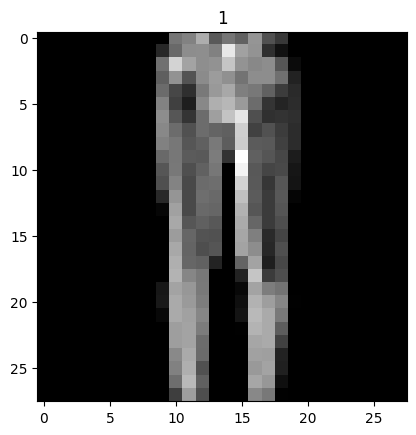

In [101]:
plt.imshow(X_test[50],cmap='gray')
plt.title(np.argmax(y_pred[50]))
plt.show()

In [102]:
model.save('model.keras')